<a href="https://colab.research.google.com/github/whkdmswls/test/blob/main/%EC%9D%B8%EA%B8%B0%ED%99%9C%20%EB%AF%B8%EB%93%9C%ED%85%80%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 1. 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop


In [7]:
# 2. Data Load (cifar10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 3. Data 전처리 (/255)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [8]:
# 4. ImageDataGenerator
train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1
)

# 5. Generator
train_data = train_gen.flow(x_train, y_train, batch_size=256, subset='training')
val_data = train_gen.flow(x_train, y_train, batch_size=256, subset='validation')

In [9]:
# 6. Model 설정
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))

# 은닉층 1
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# 은닉층 2
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# 은닉층 3 (추가)
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [11]:
# 출력층
model.add(Dense(10, activation='softmax'))

# 7. Model Compile
model.compile(optimizer=RMSprop(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 8. Model Fit
history = model.fit(train_data,
                    epochs=150,
                    validation_data=val_data,
                    callbacks=[early_stop])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 173ms/step - accuracy: 0.2240 - loss: 2.4774 - val_accuracy: 0.3366 - val_loss: 1.8688
Epoch 2/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 141ms/step - accuracy: 0.2986 - loss: 2.0224 - val_accuracy: 0.3144 - val_loss: 1.9367
Epoch 3/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 141ms/step - accuracy: 0.3327 - loss: 1.8915 - val_accuracy: 0.3336 - val_loss: 1.8446
Epoch 4/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 139ms/step - accuracy: 0.3521 - loss: 1.8206 - val_accuracy: 0.3684 - val_loss: 1.7438
Epoch 5/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - accuracy: 0.3669 - loss: 1.7713 - val_accuracy: 0.3392 - val_loss: 1.8001
Epoch 6/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.3727 - loss: 1.7526 - val_accuracy: 0.3472 - val_loss: 1.8039
Epoch 7/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 139ms/step - accuracy: 0.3843 - loss: 1.7242 - val_accuracy: 0.3552 - val_loss: 1.7989
Epoch 8/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.3840 -

In [13]:
# 9. Model Predict
result = model.predict(x_test)
predicted_labels = result.argmax(axis=1)

# 10. 결과 제출
sub = pd.DataFrame({'Label': predicted_labels})
sub.to_csv('sub.csv', index=False)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


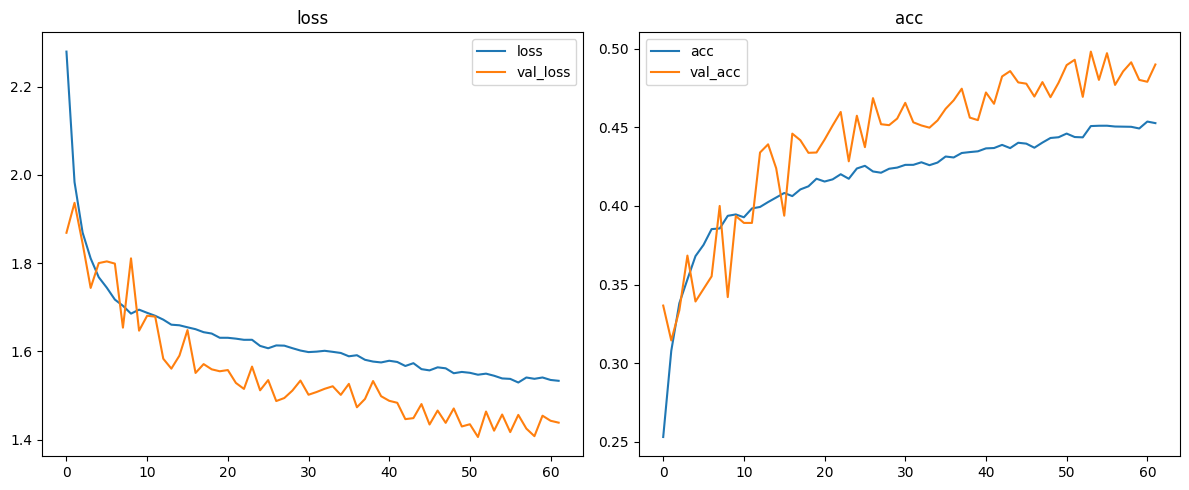

In [14]:
# 11. 성능 그래프 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('acc')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# 12. 테스트 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.5255
